In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Importing Libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading Data

In [ ]:
df= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Roman Urdu DataSet.csv')
df.head()

,Comment,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [ ]:
display(df)

,Comment,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive
...,...,...
14547,Han mene abhi dekhna start kia last 3 episodes se,Neutral
14548,Kitna acha bhai hai kehta me daant kha lun ga ...,Positive
14549,DJ ko aik pappi idrrr aikk pappii udrr,Positive
14550,Dj ki wja se drama dykna ka dil krta h,Positive


# Exploring the size of the dataset

In [ ]:
df.shape

(14552, 2)

# Checking the Unique Sentiments in dataset

In [ ]:
df["sentiment"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
df['sentiment'].value_counts()

Neutral     6964
Positive    4099
Negative    3489
Name: sentiment, dtype: int64

# Plotting the Dataset

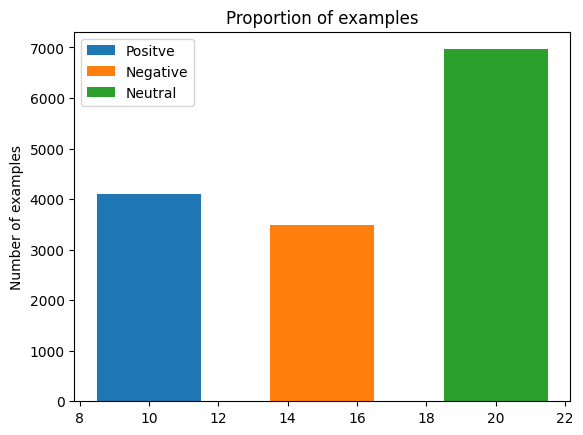

In [ ]:
Pos = df[df['sentiment'] == 'Positive'].shape[0]
Neg = df[df['sentiment'] == 'Negative'].shape[0]
Neu = df[df['sentiment'] == 'Neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

# Removing Neutral Sentiments

In [ ]:
df_removed= df[~df.sentiment.str.contains("Neutral")]

In [ ]:
df_removed["sentiment"].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df_removed['sentiment'].value_counts()

Positive    4099
Negative    3489
Name: sentiment, dtype: int64

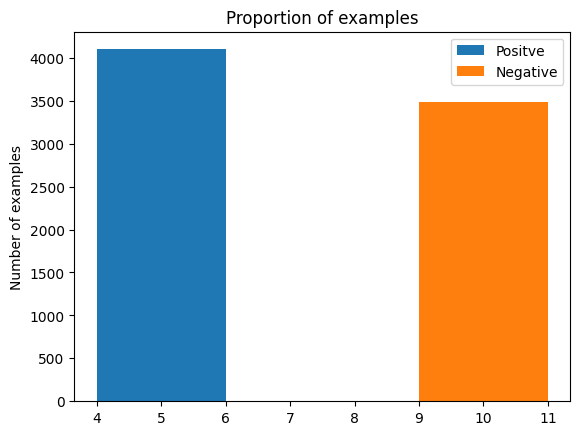

In [ ]:
Pos = df_removed[df_removed['sentiment'] == 'Positive'].shape[0]
Neg = df_removed[df_removed['sentiment'] == 'Negative'].shape[0]

# bar plot of the 2 classes
plt.bar(5,Pos,2, label="Positve")
plt.bar(10,Neg,2, label="Negative")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [ ]:
df_removed.shape[0]

7588

# Data Preprocesssing

In [ ]:
corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou','h', 'kay','je', 'kaya' ]
for i in range(0,df_removed.shape[0]):
    review = re.sub('[^a-zA-Z]',' ',df_removed.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopwords]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
df_st_removed = pd.DataFrame(corpus, columns = ['Cleaned_Review'])
display(df_st_removed)

,Cleaned_Review
0,sai kha her kisi bus bat nhi lakin hal kal bi ...
1,sahi bt
2,bt
3,wah wah
4,are wha bat
...,...
7583,mera dj fav chotu reporter
7584,kitna bhai kehta me daant kha lun ap tension lo
7585,dj aik pappi idrrr aikk pappii udrr
7586,dj wja drama dykna dil krta


# Applying to Dataframe

In [ ]:
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou','h', 'kay','je', 'kaya' ]

def preprocess_text(text):
  review = re.sub('[^a-zA-Z]',' ',text)
  review=review.lower()
  review=review.split()
  review=[word for word in review if not word in stopwords]
  return ' '.join(review)

# Apply preprocessing to the 'reviews' column and append the processed data to the DataFrame
df_removed['processed_reviews'] = df_removed['Comment'].apply(preprocess_text)

df_removed

,Comment,sentiment,processed_reviews
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,sai kha her kisi bus bat nhi lakin hal kal bi ...
1,sahi bt h,Positive,sahi bt
2,"Kya bt hai,",Positive,kya bt
3,Wah je wah,Positive,wah wah
4,Are wha kaya bat hai,Positive,are wha bat
...,...,...,...
14546,Mera bhi DJ fav hai (chotu reporter),Positive,mera dj fav chotu reporter
14548,Kitna acha bhai hai kehta me daant kha lun ga ...,Positive,kitna bhai kehta me daant kha lun ap tension lo
14549,DJ ko aik pappi idrrr aikk pappii udrr,Positive,dj aik pappi idrrr aikk pappii udrr
14550,Dj ki wja se drama dykna ka dil krta h,Positive,dj wja drama dykna dil krta


# Tokenization

In [ ]:
def tokenize_text(text):
    # Split the text on whitespace to tokenize
    tokens = text.split()
    return tokens

# Apply tokenization to the 'reviews' column and append the processed data to the DataFrame
df_removed['tokenized_reviews'] = df_removed['processed_reviews'].apply(tokenize_text)
df_removed

,Comment,sentiment,processed_reviews,tokenized_reviews
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,sai kha her kisi bus bat nhi lakin hal kal bi ...,"[sai, kha, her, kisi, bus, bat, nhi, lakin, ha..."
1,sahi bt h,Positive,sahi bt,"[sahi, bt]"
2,"Kya bt hai,",Positive,kya bt,"[kya, bt]"
3,Wah je wah,Positive,wah wah,"[wah, wah]"
4,Are wha kaya bat hai,Positive,are wha bat,"[are, wha, bat]"
...,...,...,...,...
14546,Mera bhi DJ fav hai (chotu reporter),Positive,mera dj fav chotu reporter,"[mera, dj, fav, chotu, reporter]"
14548,Kitna acha bhai hai kehta me daant kha lun ga ...,Positive,kitna bhai kehta me daant kha lun ap tension lo,"[kitna, bhai, kehta, me, daant, kha, lun, ap, ..."
14549,DJ ko aik pappi idrrr aikk pappii udrr,Positive,dj aik pappi idrrr aikk pappii udrr,"[dj, aik, pappi, idrrr, aikk, pappii, udrr]"
14550,Dj ki wja se drama dykna ka dil krta h,Positive,dj wja drama dykna dil krta,"[dj, wja, drama, dykna, dil, krta]"


# Converting Categorical Label into Numerical

In [ ]:
# Mapping sentiment labels to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0}
df_removed['label'] = df_removed['sentiment'].map(sentiment_mapping)
df_removed

,Comment,sentiment,processed_reviews,tokenized_reviews,label
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,sai kha her kisi bus bat nhi lakin hal kal bi ...,"[sai, kha, her, kisi, bus, bat, nhi, lakin, ha...",1
1,sahi bt h,Positive,sahi bt,"[sahi, bt]",1
2,"Kya bt hai,",Positive,kya bt,"[kya, bt]",1
3,Wah je wah,Positive,wah wah,"[wah, wah]",1
4,Are wha kaya bat hai,Positive,are wha bat,"[are, wha, bat]",1
...,...,...,...,...,...
14546,Mera bhi DJ fav hai (chotu reporter),Positive,mera dj fav chotu reporter,"[mera, dj, fav, chotu, reporter]",1
14548,Kitna acha bhai hai kehta me daant kha lun ga ...,Positive,kitna bhai kehta me daant kha lun ap tension lo,"[kitna, bhai, kehta, me, daant, kha, lun, ap, ...",1
14549,DJ ko aik pappi idrrr aikk pappii udrr,Positive,dj aik pappi idrrr aikk pappii udrr,"[dj, aik, pappi, idrrr, aikk, pappii, udrr]",1
14550,Dj ki wja se drama dykna ka dil krta h,Positive,dj wja drama dykna dil krta,"[dj, wja, drama, dykna, dil, krta]",1


In [ ]:
y = df_removed.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)
y
# 2 postive 0 negative 1 nuetral

array([1, 1, 1, ..., 1, 1, 0])

# Training Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_removed['processed_reviews'], df_removed['label'], test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print('----')
print(X_test.shape)
print('----')
print(y_train.shape)
print('----')
print(y_test.shape)

(6070,)
----
(1518,)
----
(6070,)
----
(1518,)


In [ ]:
print(X_train)
print('\n--X_test--\n')
print(X_test)
print('\n--y_train--\n')
print(y_train)
print('\n--y_test--\n')
print(y_test)

12842    when have poor management poor captancy so can...
14080                                     blkl mazakh nahi
13142              stuff bht low ha price ma aisa he milay
2337                                                beshak
347                               shukriya shehzadi auntie
                               ...                        
11529    january mein hazara market ke bomb blast edhi ...
11564          ap ke muqable dushman do foji bateleyan foj
11728    bht e ghatia fabric pic nazar a ra ye chez e n...
860      bharat samet tamam mumalik achay talluqat chah...
13990                      i swear mai abhi soch rae theee
Name: processed_reviews, Length: 6070, dtype: object

--X_test--

11502    magar hadse mere dil o dimagh mein aik shaded ...
12478         billion dollor zaid akhrajat takhmina lagaya
1757     karoron mere andhe maqlad lekin hindustan ke t...
1466     aik he action mein fast speed wicket ke taraf ...
586      mai apnay nabi s a w w mhbt q karu k un 

# Vectorization

In [ ]:
# Convert processed reviews to BoW features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
print(X_train_bow)
print('-----')
print(X_test_bow)

  (0, 16601)	1
  (0, 5988)	2
  (0, 12384)	2
  (0, 9529)	1
  (0, 2763)	1
  (0, 14652)	1
  (0, 2745)	1
  (0, 8805)	1
  (0, 16618)	1
  (0, 15663)	1
  (0, 11523)	1
  (0, 15702)	1
  (0, 12979)	1
  (1, 2417)	1
  (1, 9908)	1
  (1, 10982)	1
  (2, 14861)	1
  (2, 2296)	1
  (2, 9234)	1
  (2, 5641)	1
  (2, 12451)	1
  (2, 9277)	1
  (2, 548)	1
  (2, 6031)	1
  (2, 10137)	1
  :	:
  (6067, 3074)	1
  (6067, 6586)	1
  (6067, 4137)	1
  (6068, 10982)	1
  (6068, 934)	1
  (6068, 6065)	1
  (6068, 2207)	1
  (6068, 7784)	1
  (6068, 10645)	1
  (6068, 15237)	1
  (6068, 13721)	1
  (6068, 3899)	1
  (6068, 3827)	1
  (6068, 5174)	1
  (6068, 6867)	1
  (6068, 220)	1
  (6068, 15229)	1
  (6068, 13869)	1
  (6068, 2868)	1
  (6069, 9408)	1
  (6069, 184)	1
  (6069, 14663)	1
  (6069, 12859)	1
  (6069, 15004)	1
  (6069, 15669)	1
-----
  (0, 533)	1
  (0, 3961)	1
  (0, 4093)	1
  (0, 4120)	1
  (0, 5682)	1
  (0, 9354)	1
  (0, 10041)	1
  (0, 10073)	1
  (0, 11669)	1
  (0, 14128)	1
  (1, 628)	1
  (1, 2366)	1
  (1, 4204)	1
  (1, 8770)

In [ ]:
# Convert to DataFrames for visualization
columns = vectorizer.get_feature_names_out()

df_train_bow = pd.DataFrame(X_train_bow.toarray(), columns=columns)
df_test_bow = pd.DataFrame(X_test_bow.toarray(), columns=columns)

# Display the DataFrames
print("X_train_bow:")
print(df_train_bow)

print("\nX_test_bow:")
print(df_test_bow)


X_train_bow:
      aa  aaaaappppp  aaalu  aaap  aaatma  aaaya  aabaadi  aabaai  aabbba  \
0      0           0      0     0       0      0        0       0       0   
1      0           0      0     0       0      0        0       0       0   
2      0           0      0     0       0      0        0       0       0   
3      0           0      0     0       0      0        0       0       0   
4      0           0      0     0       0      0        0       0       0   
...   ..         ...    ...   ...     ...    ...      ...     ...     ...   
6065   0           0      0     0       0      0        0       0       0   
6066   0           0      0     0       0      0        0       0       0   
6067   0           0      0     0       0      0        0       0       0   
6068   0           0      0     0       0      0        0       0       0   
6069   0           0      0     0       0      0        0       0       0   

      aadam  ...  zulfein  zulfikar  zulfikhar  zulfiqar  zuli

In [ ]:
# Train a logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_bow, y_train)


LogisticRegression()

In [ ]:
# Make predictions on the test set
predictions = logistic_regression_model.predict(X_test_bow)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       682
           1       0.79      0.75      0.77       836

    accuracy                           0.76      1518
   macro avg       0.75      0.76      0.75      1518
weighted avg       0.76      0.76      0.76      1518



# Example Sentence

In [ ]:
# Example of a new sentence
new_sentence = "bohat acha"

# Preprocess the new sentence
preprocessed_sentence = preprocess_text(new_sentence)

# Vectorize the preprocessed new sentence
bow_features = vectorizer.transform([preprocessed_sentence])

# Make predictions
prediction = logistic_regression_model.predict(bow_features)

# Convert the numerical prediction to a sentiment label
sentiment_label = "positive" if prediction[0] == 1 else "negative"

# Display the result
print(f"Predicted Sentiment: {sentiment_label}")

Predicted Sentiment: positive


# Save The model

In [ ]:
import joblib
# Save the trained model to a file
joblib.dump(logistic_regression_model, '/content/drive/MyDrive/Colab Notebooks/Models/ls_sentiment_model.joblib')

['/content/drive/MyDrive/Colab Notebooks/Models/ls_sentiment_model.joblib']

In [ ]:
# Load the saved model
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Models/ls_sentiment_model.joblib')

# Example of a new sentence
new_sentence = "boha bura hua"

# Preprocess the new sentence
preprocessed_sentence = preprocess_text(new_sentence)

# Vectorize the preprocessed new sentence
bow_features = vectorizer.transform([preprocessed_sentence])

# Make predictions using the loaded model
prediction = loaded_model.predict(bow_features)

# Convert the numerical prediction to a sentiment label
sentiment_label = "positive" if prediction[0] == 1 else "negative"

# Display the result
print(f"Predicted Sentiment: {sentiment_label}")


Predicted Sentiment: negative


# LSTM

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Example sequences
sequences = [
    [1, 2, 3],
    [4, 5],
    [6, 7, 8, 9]
]

# Pad sequences to the same length
padded_sequences = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')

print("Original Sequences:")
print(sequences)
print("\nPad Sequences:")
print(padded_sequences)


Original Sequences:
[[1, 2, 3], [4, 5], [6, 7, 8, 9]]

Pad Sequences:
[[1 2 3 0 0]
 [4 5 0 0 0]
 [6 7 8 9 0]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_removed['processed_reviews'], df_removed['label'], test_size=0.2, random_state=42)

# Tokenize the text
max_words = 1000  # Choose the maximum number of words to keep in the vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in X_train_sequence)
X_train_padded = pad_sequences(X_train_sequence, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequence, maxlen=max_len)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
lstm_model.add(LSTM(units=100))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
lstm_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/10
190/190 [==============================] - 14s 58ms/step - loss: 0.6232 - accuracy: 0.6496 - val_loss: 0.5567 - val_accuracy: 0.7200
Epoch 2/10
190/190 [==============================] - 5s 24ms/step - loss: 0.4914 - accuracy: 0.7545 - val_loss: 0.5416 - val_accuracy: 0.7246
Epoch 3/10
190/190 [==============================] - 3s 18ms/step - loss: 0.4544 - accuracy: 0.7771 - val_loss: 0.5571 - val_accuracy: 0.7121
Epoch 4/10
190/190 [==============================] - 2s 13ms/step - loss: 0.4362 - accuracy: 0.7876 - val_loss: 0.5670 - val_accuracy: 0.7121
Epoch 5/10
48/48 [==============================] - 0s 6ms/step - loss: 0.5416 - accuracy: 0.7246
Test Accuracy: 0.72


In [ ]:
# Save the entire model (architecture + weights)
lstm_model.save('/content/drive/MyDrive/Colab Notebooks/Models/LSTM_sentiment_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Models/LSTM_sentiment_model.h5')

# Example of a new sentence
new_sentence = "ganda"

# Preprocess the new sentence
preprocessed_sentence = preprocess_text(new_sentence)

# Tokenize and pad the new sentence
new_sentence_sequence = tokenizer.texts_to_sequences([preprocessed_sentence])
new_sentence_padded = pad_sequences(new_sentence_sequence, maxlen=max_len)

# Make predictions using the loaded model
prediction = loaded_model.predict(new_sentence_padded)

# Convert the numerical prediction to a sentiment label
sentiment_label = "positive" if prediction[0][0] > 0.5 else "negative"

# Display the result
print(f"Predicted Sentiment: {sentiment_label}")


1/1 [==============================] - 0s 480ms/step
Predicted Sentiment: negative


# Naive Bayes



In [ ]:
# Train a Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_bow, y_train)

# Make predictions on the test set
predictions = naive_bayes_model.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       682
           1       0.78      0.77      0.78       836

    accuracy                           0.75      1518
   macro avg       0.75      0.75      0.75      1518
weighted avg       0.75      0.75      0.75      1518



# Comparison of Naive, Logistic and LSTM

In [ ]:
# Make predictions
logistic_regression_predictions = logistic_regression_model.predict(X_test_bow)
naive_bayes_predictions = naive_bayes_model.predict(X_test_bow)
lstm_probabilities = lstm_model.predict(X_test_padded)

48/48 [==============================] - 0s 6ms/step


In [ ]:
print(logistic_regression_predictions)
print(naive_bayes_predictions)
print(lstm_probabilities)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]
[[0.43926477]
 [0.3424774 ]
 [0.9546812 ]
 ...
 [0.7674054 ]
 [0.93340564]
 [0.9999989 ]]


In [ ]:
threshold = 0.5
lstm_predictions = (lstm_probabilities >= threshold).astype(int)

# Evaluate the models
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
lstm_accuracy = accuracy_score(y_test, lstm_predictions)

print("Model Comparison:")
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.2f}")
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

# You can also print classification reports for more detailed metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_regression_predictions))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))

print("\nLSTM Classification Report:")
print(classification_report(y_test, lstm_predictions))

Model Comparison:
Logistic Regression Accuracy: 0.76
Naive Bayes Accuracy: 0.75
LSTM Accuracy: 0.72

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       682
           1       0.79      0.75      0.77       836

    accuracy                           0.76      1518
   macro avg       0.75      0.76      0.75      1518
weighted avg       0.76      0.76      0.76      1518


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       682
           1       0.78      0.77      0.78       836

    accuracy                           0.75      1518
   macro avg       0.75      0.75      0.75      1518
weighted avg       0.75      0.75      0.75      1518


LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       682
           1       0.78     